# 第3章 最尤推定法：確率を用いた推定理論

## 「03-estimator_bias.py」の解説

ITエンジニアための機械学習理論入門「第3章 最尤推定法：確率を用いた推定理論」で使用しているサンプルコード「03-estimator_bias.py」の解説です。

※ 解説用にコードの内容は少し変更しています。

はじめに必要なモジュールをインポートしておきます。

関数 normal は、正規分布に従う乱数を生成するために利用します。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal

平均0、標準偏差1の正規分布を用いて、「N 個のデータを取得して標本平均、標本分散、不変分散を求める」という操作を2000回繰り返して、それぞれの平均値を求めます。これをさらに、N を2〜51に変化させて実行します。

まず、それぞれの結果を保存するリストを用意します。

In [2]:
# 2000回繰り返した際の個々のデータ
raw_linex = []    # データ数
raw_mu = []       # 標本平均
raw_s2 = []       # 標本分散
raw_u2 = []       # 不変分散

# 2000回全体の平均値
mean_linex = []    # データ数
mean_mu = []       # 標本平均
mean_s2 = []       # 標本分散
mean_u2 = []       # 不変分散

データの取得と推定を実施します。

In [3]:
for n in np.arange(2,51): # 観測データ数Nを変化させて実行
    for c in range(2000): # 特定のNについて2000回の推定を繰り返す
        ds = normal(loc=0, scale=1, size=n)
        raw_mu.append(np.mean(ds))        # 標本平均
        raw_s2.append(np.var(ds))         # 標本分散
        raw_u2.append(np.var(ds)*n/(n-1)) # 不偏分散
        raw_linex.append(n)
    mean_mu.append(np.mean(raw_mu)) # 標本平均の平均
    mean_s2.append(np.mean(raw_s2)) # 標本分散の平均
    mean_u2.append(np.mean(raw_u2)) # 不偏分散の平均
    mean_linex.append(n)

グラフを見やすくするために、2000個のデータを40個に間引きます。

In [4]:
    # プロットデータを40個に間引きする
    raw_linex = raw_linex[0:-1:50]
    raw_mu = raw_mu[0:-1:50]
    raw_s2 = raw_s2[0:-1:50]
    raw_u2 = raw_u2[0:-1:50]

結果をグラフに描画する関数を用意します。

In [5]:
def draw_subplot(subplot, linex1, liney1, linex2, liney2, ylim):
    subplot.set_ylim(ylim)
    subplot.set_xlim(min(linex1), max(linex1)+1)
    subplot.scatter(linex1, liney1)
    subplot.plot(linex2, liney2, color='red', linewidth=4, label="mean")
    subplot.legend(loc=0)

標本平均のグラフを表示します。

データ数によらず、「標本平均の平均」は真の平均0に一致することがわかります。

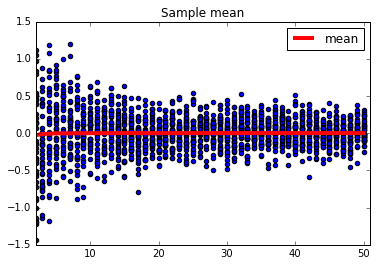

In [6]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_title('Sample mean')
draw_subplot(subplot, raw_linex, raw_mu, mean_linex, mean_mu, (-1.5,1.5))

標本分散のグラフを表示します。

データ数が少ない場合、「標本分散の平均」は真の分散1より小さくなることがわかります。

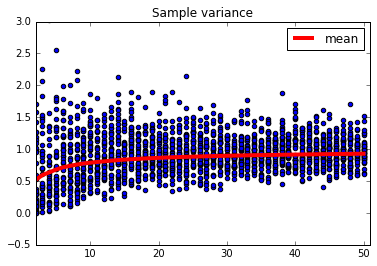

In [7]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_title('Sample variance')
draw_subplot(subplot, raw_linex, raw_s2, mean_linex, mean_s2, (-0.5,3.0))

普遍分散のグラフを表示します。

データ数によらず、「普遍分散の平均」は真の分散1に一致することがわかります。

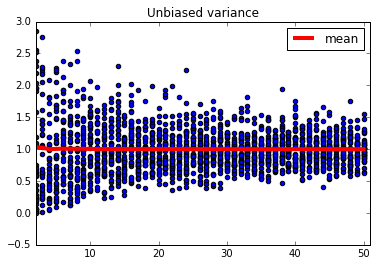

In [8]:
    fig3 = plt.figure()
    subplot = fig3.add_subplot(1,1,1)
    subplot.set_title('Unbiased variance')
    draw_subplot(subplot, raw_linex, raw_u2, mean_linex, mean_u2, (-0.5,3.0))